In [1]:
# The purpose of this project is to examine the potential influence of NVIDIA's Graphics Processing Unit (GPU) product launches and the price trends of Bitcoin on NVIDIA's stock price. 

# Import pandas
import pandas as pd

# Find GPU release dates
url = "https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#GeForce_40_series"

# Web Scraping
tables = pd.read_html(url)

# Lists
models = []
launch_dates = []

# Iterate over each table
for table in tables:
    # Check if 'Model' and 'Launch' are columns in the table
    if 'Model' in table.columns and 'Launch' in table.columns:
        # Add the model names and launch dates to the lists
        models.extend(table['Model'].values)
        launch_dates.extend(table['Launch'].values)

# Clean up the lists to remove lists within lists
models = [''.join(map(str, model)) for model in models]
launch_dates = [''.join(map(str, launch)) for launch in launch_dates]

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Launch Date': launch_dates
})

# Convert 'Launch Date' to datetime format
df['Launch Date'] = pd.to_datetime(df['Launch Date'], format='%B %d, %Y', errors='coerce')

# Drop the rows where 'Launch Date' is NaT
df = df.dropna(subset=['Launch Date'])

# Display the DataFrame
print(df)

                                  Model Launch Date
0                              STG-2000  1995-05-22
1                              Riva 128  1997-08-25
2                            Riva 128ZX  1998-02-23
3                              Riva TNT  1998-06-15
4                                 Vanta  1999-03-22
..                                  ...         ...
795            L40 GPU accelerator[388]  2022-10-13
799               XGPU (Xbox)[393][394]  2001-11-15
800            RSX (PS3)[395][396][397]  2006-11-11
801  NX-SoC (Nintendo Switch)[398][399]  2017-03-03
802  NX-SoC (Nintendo Switch)[398][399]  2019-08-30

[432 rows x 2 columns]


In [2]:
# Now let's find out how GPU launches impact NV's stock price
import yfinance as yf

# Get NVIDIA stock data
nvidia = yf.download('NVDA', start='1995-01-01')

# Resample to business days, filling in missing values
nvidia = nvidia.asfreq('B', method='pad')

# Initialize a list to store the stock price difference
price_diff = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Get the launch date
    launch_date = row['Launch Date']
    
    # Calculate the dates of the trading day before and after the launch date
    before_launch = launch_date - pd.DateOffset(days=1)
    after_launch = launch_date + pd.DateOffset(days=1)
    
    # Ensure these days are business days
    while before_launch.dayofweek > 4:
        before_launch -= pd.DateOffset(days=1)
    while after_launch.dayofweek > 4:
        after_launch += pd.DateOffset(days=1)
    
    # Get the closing prices for these days
    try:
        before_price = nvidia.loc[before_launch.strftime('%Y-%m-%d'), 'Close']
        after_price = nvidia.loc[after_launch.strftime('%Y-%m-%d'), 'Close']
    except KeyError:
        # If there's no stock data for these days, add None to the list and continue
        price_diff.append(None)
        continue

    # Calculate the price difference and add it to the list
    price_diff.append(after_price - before_price)

# Add the price differences to the DataFrame
df['Price Difference'] = price_diff

# Display the DataFrame
print(df)

[*********************100%***********************]  1 of 1 completed
                                  Model Launch Date  Price Difference
0                              STG-2000  1995-05-22               NaN
1                              Riva 128  1997-08-25               NaN
2                            Riva 128ZX  1998-02-23               NaN
3                              Riva TNT  1998-06-15               NaN
4                                 Vanta  1999-03-22         -0.039062
..                                  ...         ...               ...
795            L40 GPU accelerator[388]  2022-10-13         -2.730003
799               XGPU (Xbox)[393][394]  2001-11-15         -0.015000
800            RSX (PS3)[395][396][397]  2006-11-11          0.260000
801  NX-SoC (Nintendo Switch)[398][399]  2017-03-03         -0.332500
802  NX-SoC (Nintendo Switch)[398][399]  2019-08-30          0.127499

[432 rows x 3 columns]


In [3]:
# Remove rows where 'Price Difference' is NaN
df = df.dropna(subset=['Price Difference'])

# Display the DataFrame
print(df)

                                  Model Launch Date  Price Difference
4                                 Vanta  1999-03-22         -0.039062
7                             Riva TNT2  1999-03-15          0.003906
8                         Riva TNT2 Pro  1999-10-12         -0.019532
9                       Riva TNT2 Ultra  1999-03-15          0.003906
14     GeForce2 MX IGP + nForce 220/420  2001-06-04          0.136250
..                                  ...         ...               ...
795            L40 GPU accelerator[388]  2022-10-13         -2.730003
799               XGPU (Xbox)[393][394]  2001-11-15         -0.015000
800            RSX (PS3)[395][396][397]  2006-11-11          0.260000
801  NX-SoC (Nintendo Switch)[398][399]  2017-03-03         -0.332500
802  NX-SoC (Nintendo Switch)[398][399]  2019-08-30          0.127499

[428 rows x 3 columns]


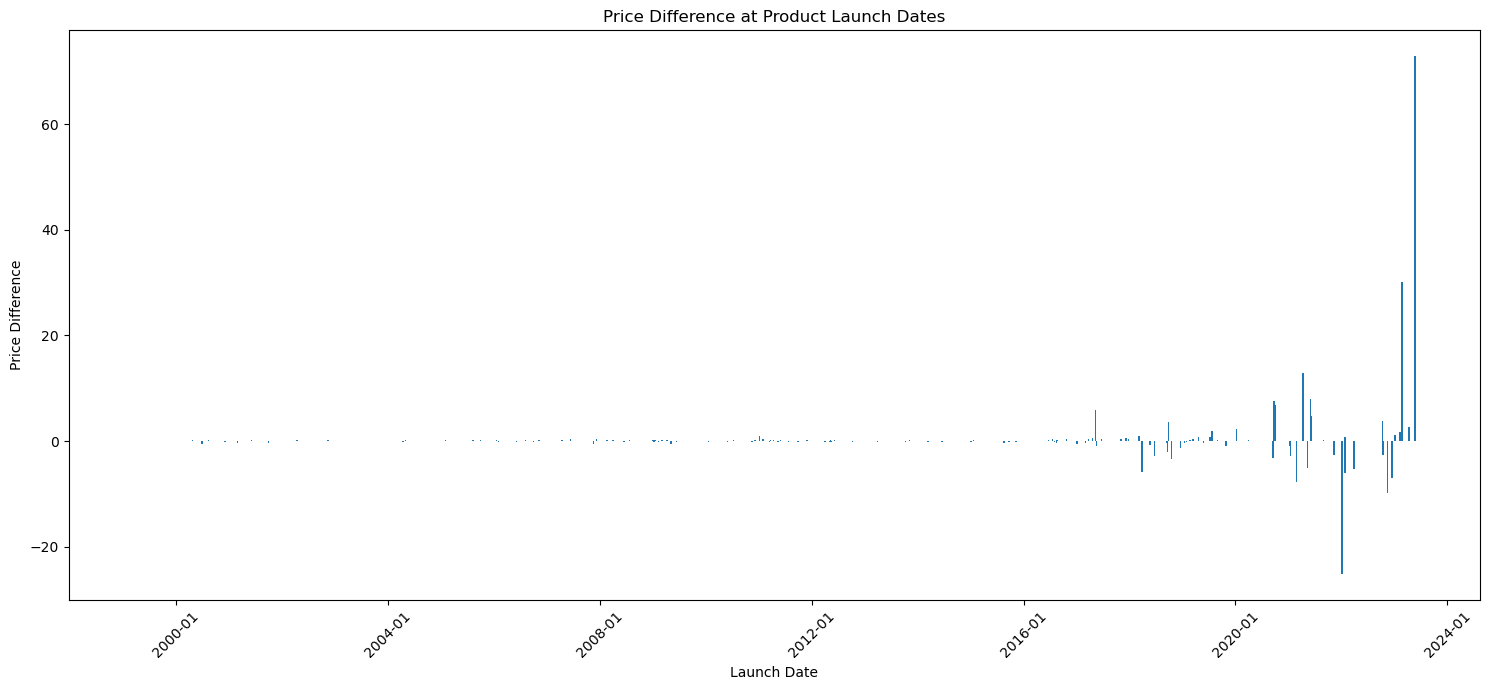

In [4]:
# Now let's try to get some visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the DataFrame by 'Launch Date'
df = df.sort_values('Launch Date')

# Create a figure and a plot
fig, ax = plt.subplots(figsize=(15,7))

# Bar chart with 'Launch Date' on the x-axis and 'Price Difference' on the y-axis
ax.bar(df['Launch Date'], df['Price Difference'], width=10)

# Set the date format
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)

# Rotate date labels to prevent overlap
plt.xticks(rotation=45)

# Set title and labels
plt.title('Price Difference at Product Launch Dates')
plt.xlabel('Launch Date')
plt.ylabel('Price Difference')

# Show the plot
plt.tight_layout()
plt.show()

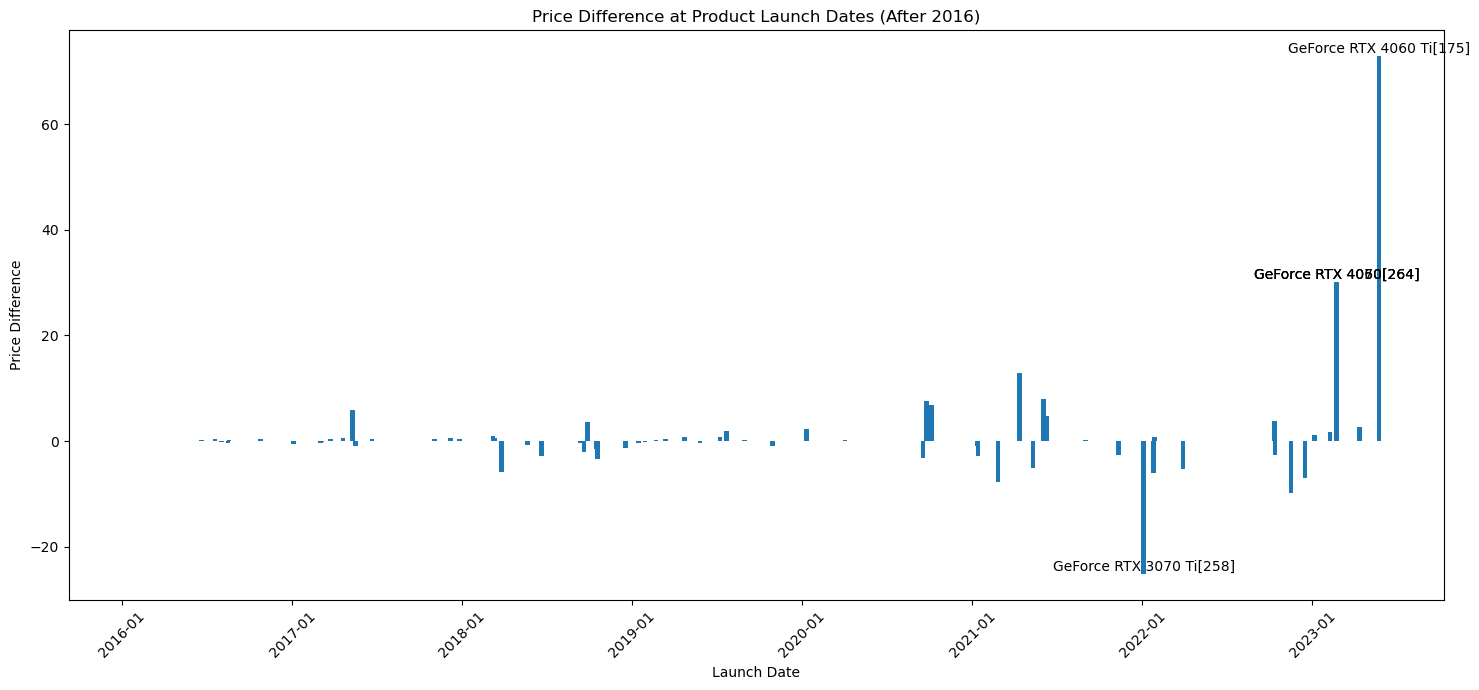

In [11]:
# Filter the DataFrame to only include rows where 'Launch Date' is after 2016
df_filtered = df[df['Launch Date'] > '2016-01-01']
df_filtered = df_filtered.sort_values('Launch Date')

# Create a figure and a plot
fig, ax = plt.subplots(figsize=(15,7))

# Bar chart with 'Launch Date' on the x-axis and 'Price Difference' on the y-axis
ax.bar(df_filtered['Launch Date'], df_filtered['Price Difference'], width=10)

# Annotate the bars where 'Price Difference' is > 20 or < -10
for _, row in df_filtered.iterrows():
    if row['Price Difference'] > 20 or row['Price Difference'] < -10:
        ax.text(row['Launch Date'], row['Price Difference'], row['Model'], rotation=0, va='bottom', ha='center')

# Set the date format
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)

# Rotate date labels to prevent overlap
plt.xticks(rotation=45)

# Set title and labels
plt.title('Price Difference at Product Launch Dates (After 2016)')
plt.xlabel('Launch Date')
plt.ylabel('Price Difference')

# Show the plot
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


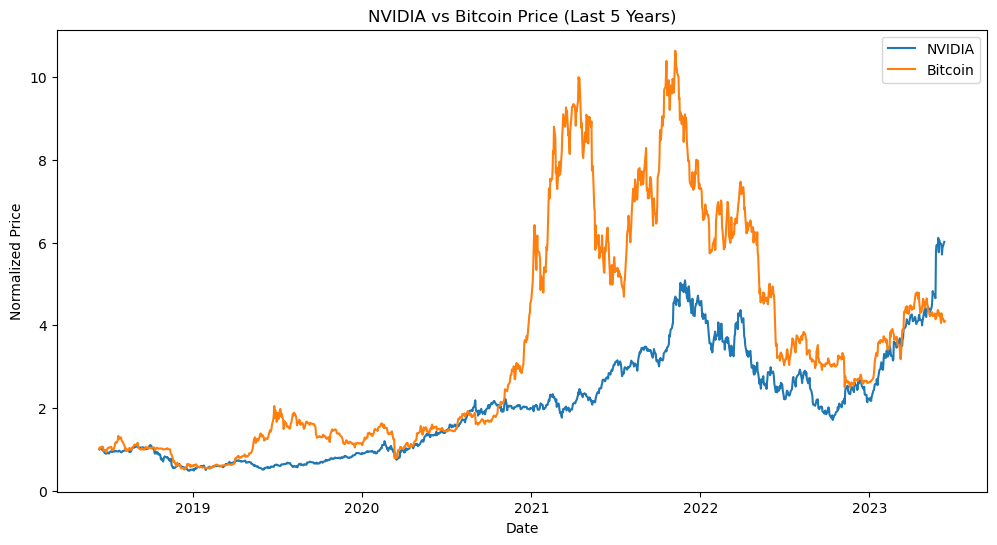

In [12]:
# Now we want to see how NV's stock price is responding to the price of Bitcoins
# Download NVIDIA and Bitcoin data for the past 5 years
nvidia = yf.download('NVDA', period='5y')
bitcoin = yf.download('BTC-USD', period='5y')

# Resample data to business days, filling in missing values
nvidia = nvidia.asfreq('B', method='pad')
bitcoin = bitcoin.asfreq('B', method='pad')

# Normalize data to start at the same point for better comparison
nvidia_normalized = nvidia['Close'] / nvidia['Close'].iloc[0]
bitcoin_normalized = bitcoin['Close'] / bitcoin['Close'].iloc[0]

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(nvidia_normalized, label='NVIDIA')
plt.plot(bitcoin_normalized, label='Bitcoin')
plt.title('NVIDIA vs Bitcoin Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


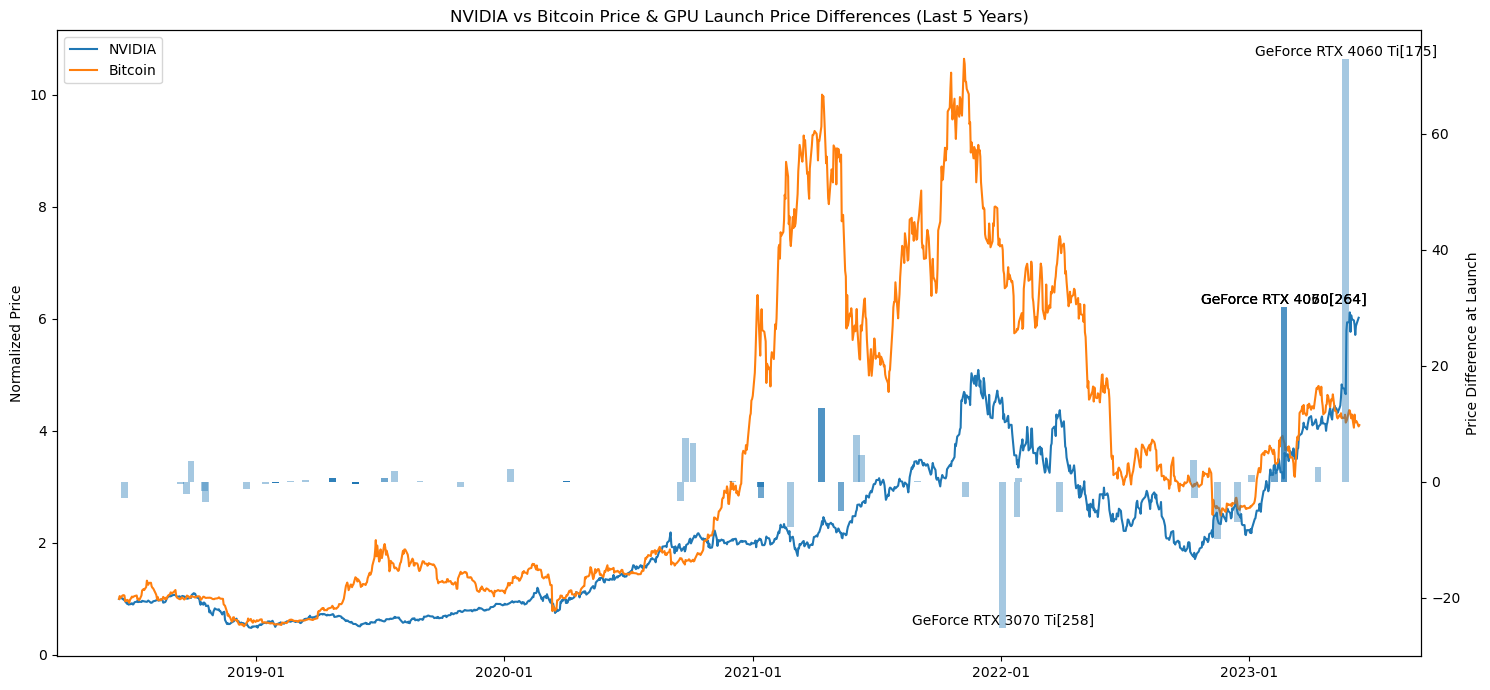

In [16]:
# Let's try to directly combine the prices and the GPU launches

# Download NVIDIA and Bitcoin data for the past 5 years
nvidia = yf.download('NVDA', period='5y')
bitcoin = yf.download('BTC-USD', period='5y')

# Resample data to business days, filling in missing values
nvidia = nvidia.asfreq('B', method='pad')
bitcoin = bitcoin.asfreq('B', method='pad')

# Normalize data to start at the same point for better comparison
nvidia_normalized = nvidia['Close'] / nvidia['Close'].iloc[0]
bitcoin_normalized = bitcoin['Close'] / bitcoin['Close'].iloc[0]

# Filter the launch DataFrame to only include rows where 'Launch Date' is within the past 5 years
df_filtered = df[df['Launch Date'] > nvidia.index.min()]

# Create a figure and a plot
fig, ax1 = plt.subplots(figsize=(15,7))

# Line chart comparing NVIDIA and Bitcoin prices
ax1.plot(nvidia_normalized, label='NVIDIA')
ax1.plot(bitcoin_normalized, label='Bitcoin')
ax1.set_ylabel('Normalized Price')

# Create a secondary y-axis for the price differences
ax2 = ax1.twinx()
# Bar chart showing the price difference at each product launch date
ax2.bar(df_filtered['Launch Date'], df_filtered['Price Difference'], width=10, alpha=0.4)
ax2.set_ylabel('Price Difference at Launch')

# Annotate the bars where 'Price Difference' is > 20 or < -10
for _, row in df_filtered.iterrows():
    if row['Price Difference'] > 20 or row['Price Difference'] < -10:
        ax2.text(row['Launch Date'], row['Price Difference'], row['Model'], rotation=0, va='bottom', ha='center')

# Set the x-axis date format
date_format = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(date_format)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set title and labels
plt.title('NVIDIA vs Bitcoin Price & GPU Launch Price Differences (Last 5 Years)')
plt.xlabel('Date')

# Show legend for line chart
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Find most influential luanches
significant_changes = df_filtered.loc[(df_filtered['Price Difference'] > 20) | (df_filtered['Price Difference'] < -10)]

print(significant_changes)

                        Model Launch Date  Price Difference
551  GeForce RTX 3070 Ti[258]  2022-01-04        -25.169983
554     GeForce RTX 4050[264]  2023-02-22         30.089996
555     GeForce RTX 4060[264]  2023-02-22         30.089996
556     GeForce RTX 4070[264]  2023-02-22         30.089996
338  GeForce RTX 4060 Ti[175]  2023-05-24         72.919983
